# Algorithms Final Assignment
### Helena Belloff

**Problem 1**

In [ ]:
'''
HW problem 1

Suppose we have numbers between 1 and 1000 in a BST and we search for the number 363. 
Which (at least one) of the following sequences could not be the sequence of nodes examined?

a. 2, 252, 401, 398, 330, 344, 397, 363
b. 924, 220, 911, 244, 898, 258, 362, 363
c. 925, 202, 911, 240, 912, 245, 363
d. 2, 399, 387, 219, 266, 382, 381, 278, 363
e. 935, 278, 347, 621, 299, 392, 358, 363
'''

'''  
Answer:

C and E don't work for BST.

For C:

   925
  /   \
 202
/   \
    911
    /  \
   240
   /  \
      912
      /  \
     245
     /  \
        363

C falls apart because 912 is to the left of 911 and it should be to the right of 911 because it is larger.

For E:

     935 
     /  \
    278
    /  \
       347
       /  \ 
          621
          /  \
        299
        /  \ 
           392 
           /  \ 
         358
         /  \
           363
           
E falls apart because 299 is to the right of 347 and it should be to the left because it is smaller.

'''

**Problem 2**

In [ ]:
'''
HW problem 2

https://probablydance.com/2018/06/16/fibonacci-hashing-the-optimization-that-the-world-forgot-or-a-better-alternative-to-integer-modulo/

a. Suppose we wish to search a linked list of length n, where each element contains a key k along with a hash value h(k). 
Each key is a long character string. How might we take advantage of the hash values when searching the list for an element 
with a given key?

b. Consider a hash table of size m = 1000 and a corresponding hash function h(k) = floor(m (kA mod 1)) for A = (sqrt(5) - 1)/2).
Note that mod 1 means take the fractional component of kA i.e. kA - floor(kA). 
Compute the hashes for keys = {61, 62, 63, 64, 65}

c. In simple uniform hashing, each key is assumed to have equal probability to map to any of the hashes in a given table 
of size m. Given an open-address table of size 100 and 2 random keys, what is the probability that they hash to the same 
value? What is the probability that they hash to different values?
'''

**Problem 2a**

Since we have a linked list with key k and an associated hash vlaue h(k), we can use the hash values to search for our given key. The keys are long character strings so searching the linked list by hash values will be a much faster since the hash values will be numeric. Once you have the generated hash value for the key you are trying to search for, just compare it with the hash values along the length of the list until you find your match and its associated key!

**Problem 2b**

In [1]:
import math

keys = [61, 62, 63, 64, 65]

def h(k):
    m = 1000
    A = (math.sqrt(5) - 1) / 2
    h = m * (k * A % 1)
    return math.floor(h)

for k in keys:
    print((k, h(k)))

(61, 700)
(62, 318)
(63, 936)
(64, 554)
(65, 172)


**Problem 2c**

Same hash value: First can go anywhere so 100/100 spots. Second goes in the same spot as the first so it's 1/100 spots.

P(same hash value) = (100/100) * (1/100) = 100/10000 = 1/100 = **0.01**

Different hash values: First can go anywhere so 100/100 spots. Second goes anywhere else so 99/100 spots.

P(different hash value) = (100/100) * (99/100) = 9900/10000 = 99/100 = **0.99**

**Problem 3**

In [2]:
'''
HW problem 3

a. What are all the possible valid BSTs drawn from the array [1, 2, 3]? How many are there?
b. In lab we explored the number of possible binary tree topologies given a height of n and n nodes (spoiler: 2^(n-1)). 
It turns out that the number of binary tree topologies (given all possible heights) with
n nodes is the Catalan Number C_n = 1/(n+1)*(2n choose n). Recursively, this can also be written as 
C_n = sum_{k = 0} ^ {n-1} c_k * c_{n-1-k} with c_0 =1 and n >= 1. 
i. Write a function cn_recursive(n) that computes the n-th catalan number recursively.
ii. Write a function cn_fast(n) that computes the n-th catalan number using the closed form formulation.
iii. Conduct doubling experiments (just n = 1, 2, 4, and 8) to compare their runtimes. Plot the result on a log-log plot.
'''

import math
import time 
import numpy as np
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

def cn_fast(n):
    return 1/(n+1) * nCr(2*n, n)


def cn_recursive(n):
    s = 0
    if n == 0:
        return 1
    else:
        for k in range(0, n):
            s += cn_recursive(k) * cn_recursive(n-1-k)
        return s


**Problem 3a**

In [ ]:
'''
(1)   1
     / \
        2
       / \
          3
         
         
(2)   3
     / \
    2
   / \
  1
  
  
(3)   1
     / \
        3
       / \
      2 


(4)   3
     / \
    1
   / \
      2
      

(5)  2
    / \
   1   3
   

There are 5 possible BSTs.
  
'''

**Problem 3b**

In [2]:
# i 

def cn_recursive(n):
    s = 0
    if n == 0:
        return 1
    else:
        for k in range(0, n):
            s += cn_recursive(k) * cn_recursive(n-1-k)
        return s

# Test
for n in range(0,10):
    print(n, cn_recursive(n))

0 1
1 1
2 2
3 5
4 14
5 42
6 132
7 429
8 1430
9 4862


In [3]:
# ii
import math

def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

def cn_fast(n):
    return 1/(n+1) * nCr(2*n, n)

# Test
for n in range(0,10):
    print(n, cn_fast(n))

0 1.0
1 1.0
2 2.0
3 5.0
4 14.0
5 42.0
6 132.0
7 429.0
8 1430.0
9 4862.0


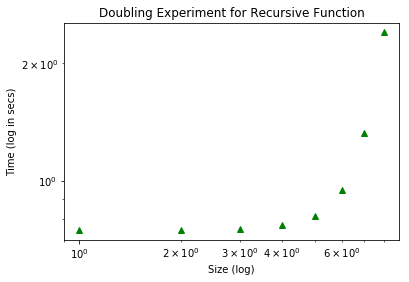

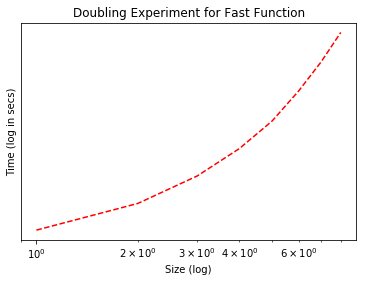

In [4]:
# iii

# Doubling experiment n = 1, 2, 4, and 8

import math
import time 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Runtime Function
def runtime(function, parameters, iters = 1000):
    init = time.clock()
    for i in range(iters):
        function(*parameters)
    fin = time.clock()
    time_in_sec = fin - init / iters
    return time_in_sec

# Doubling Function
def doubling_catalan(function, start = 1, end = 8, iters = 1000):
    run_time = []
    inputs = []
    for i in range(start,end+1):
        timing = runtime(function,[i],iters=iters)
        run_time.append(timing)
        inputs.append(i)
    return run_time, inputs

# Not sure if these need to be on the same plot, but the scales are pretty different 
# so I'm putting them in separate plots

# First we do recursive function:
run_time, inputs = doubling_catalan(cn_recursive, start = 1, end = 8, iters = 1000)
plt.plot(inputs,run_time,'g^')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Size (log)")
plt.ylabel("Time (log in secs)")
plt.title("Doubling Experiment for Recursive Function")
plt.show()

time, startend = doubling_catalan(cn_fast, start = 1, end = 8, iters = 1000)
plt.plot(startend, time,'r--')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Size (log)")
plt.ylabel("Time (log in secs)")
plt.title("Doubling Experiment for Fast Function")
plt.show()


**Problem 4**

In [106]:
'''
HW Problem 4

As discussed in lab and lecture, binary search trees derive a lot of their power from being appropriately balanced. 
Here we will show that the search time (here approximated by number of compares) for random keys in a BST containing 
uniformly randomly distributed values is c lg n where n is the amount of nodes in the tree and c is 1.39 - note that 
this is lg base 2. In greater detail:
(a) Create a dict mapping keys to arrays with linear entries of length N (N = 100, 200, 400, ... 51200) derived from 
random sampling from a uniform distribution [0, 100000].
(b) Store entries in a binary search tree - the class implementation from lab is provided below, with a 
small modification to count the number of compares performed in each recursion for find(). You may find it helpful
to similarly construct an analogous dict in (a) with the keys mapping to BST instances.
(c) For each array, compute the average time of 1000 keys drawn at random (from the linear array corresponding to each 
tree).
(d) What is your estimated constant c for each tree size?
'''

'''
BST Implementation
'''

class Node:
    def __init__(self, val):
        self.val = val
        self.leftChild = None
        self.rightChild = None
    
    def get(self):
        return self.val
    
    def set(self, val):
        self.val = val
        
    def getChildren(self):
        children = []
        if(self.leftChild != None):
            children.append(self.leftChild)
        if(self.rightChild != None):
            children.append(self.rightChild)
        return children
        

class BST:
    def __init__(self):
        self.root = None

    def setRoot(self, val):
        self.root = Node(val)
    
    def insert(self, val):
        if(self.root is None):
            self.setRoot(val)
        else:
            self.insertNode(self.root, val)

    def insertNode(self, currentNode, val):
        if(val <= currentNode.val):
            if(currentNode.leftChild):
                self.insertNode(currentNode.leftChild, val)
            else:
                currentNode.leftChild = Node(val)
        elif(val > currentNode.val):
            if(currentNode.rightChild):
                self.insertNode(currentNode.rightChild, val)
            else:
                currentNode.rightChild = Node(val)
                
    def find(self, val, count = 0):
        return self.findNode(self.root, val, count)

    def findNode(self, currentNode, val, count):
        if(currentNode is None):
            return False, count + 1
        elif(val == currentNode.val):
            return True, count + 1
        elif(val < currentNode.val):
            return self.findNode(currentNode.leftChild, val, count + 1)
        else:
            return self.findNode(currentNode.rightChild, val, count + 1)
    
    def traverse(self):
        if self.root is not None:
            self.inorder_traverse(self.root.leftChild)
            print(self.root.val)
            self.inorder_traverse(self.root.rightChild)

    def inorder_traverse(self, Node):
        if Node.leftChild is not None:
            self.inorder_traverse(Node.leftChild)    
        print(Node.val)
        if Node.rightChild is not None:
            self.inorder_traverse(Node.rightChild)

'''            
(a) Create a dict mapping keys (N = 100, 200, 400, ... 51200) to arrays with linear entries derived from 
random sampling from a uniform distribution [0, 100000].
(b) Store entries in a binary search tree - the class implementation from lab is provided below. You may find it helpful
to similarly construct an analogous dict in (a) with the keys mapping to BST instances.
(c) For each array, compute the average time of 1000 keys drawn at random (from the linear array corresponding to each tree).
(d) What is your estimated constant c for each tree size?
'''


'            \n(a) Create a dict mapping keys (N = 100, 200, 400, ... 51200) to arrays with linear entries derived from \nrandom sampling from a uniform distribution [0, 100000].\n(b) Store entries in a binary search tree - the class implementation from lab is provided below. You may find it helpful\nto similarly construct an analogous dict in (a) with the keys mapping to BST instances.\n(c) For each array, compute the average time of 1000 keys drawn at random (from the linear array corresponding to each tree).\n(d) What is your estimated constant c for each tree size?\n'

**Problem 4a**

In [81]:
import numpy as np

# a: arrays of increasing size (powers of 2)

def dict_map(num):
    return {x:entry for x,entry in zip(range(0,num),np.random.randint(0,100000,num))}

mapping = {(2**x)*100:dict_map((2**x)*100) for x in range(0,10)}
print(mapping.keys())
print('______________________________________________________________________')
print(mapping)

# You'll see they increase by 100, 200, 400, 800, ..., 51200 and each have the associated value arrays

dict_keys([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200])
______________________________________________________________________
{100: {0: 60911, 1: 84188, 2: 6716, 3: 50833, 4: 28181, 5: 55782, 6: 32208, 7: 46640, 8: 54001, 9: 65510, 10: 28089, 11: 98079, 12: 30288, 13: 7373, 14: 56826, 15: 50503, 16: 19990, 17: 53517, 18: 85553, 19: 62377, 20: 33327, 21: 399, 22: 21512, 23: 69398, 24: 3286, 25: 45086, 26: 26704, 27: 72480, 28: 25064, 29: 30887, 30: 98235, 31: 54743, 32: 23538, 33: 42483, 34: 85300, 35: 27262, 36: 4796, 37: 74265, 38: 21198, 39: 13667, 40: 41123, 41: 55374, 42: 73778, 43: 26310, 44: 5792, 45: 25640, 46: 4033, 47: 64056, 48: 23562, 49: 14790, 50: 66999, 51: 78842, 52: 9672, 53: 99820, 54: 67280, 55: 9036, 56: 5642, 57: 90411, 58: 46012, 59: 97510, 60: 68191, 61: 66387, 62: 89432, 63: 38918, 64: 17850, 65: 82815, 66: 28030, 67: 81407, 68: 21726, 69: 3996, 70: 88706, 71: 74110, 72: 29393, 73: 37645, 74: 77765, 75: 4690, 76: 8112, 77: 2799, 78: 55856, 79: 219

**Problem 4b**

In [82]:
# b: doubling experiment for insertion into a BST class

'''
BST Implementation
'''

class Node:
    def __init__(self, val):
        self.val = val
        self.leftChild = None
        self.rightChild = None
    
    def get(self):
        return self.val
    
    def set(self, val):
        self.val = val
        
    def getChildren(self):
        children = []
        if(self.leftChild != None):
            children.append(self.leftChild)
        if(self.rightChild != None):
            children.append(self.rightChild)
        return children
        

class BST:
    
    def __init__(self):
        self.root = None

    def setRoot(self, val):
        self.root = Node(val)
    
    def insert(self, val):
        if(self.root is None):
            self.setRoot(val)
        else:
            self.insertNode(self.root, val)

    def insertNode(self, currentNode, val):
        if(val <= currentNode.val):
            if(currentNode.leftChild):
                self.insertNode(currentNode.leftChild, val)
            else:
                currentNode.leftChild = Node(val)
        elif(val > currentNode.val):
            if(currentNode.rightChild):
                self.insertNode(currentNode.rightChild, val)
            else:
                currentNode.rightChild = Node(val)
                
    def find(self, val, count = 0):
        return self.findNode(self.root, val, count)

    def findNode(self, currentNode, val, count):
        if(currentNode is None):
            return False, count + 1
        elif(val == currentNode.val):
            return True, count + 1
        elif(val < currentNode.val):
            return self.findNode(currentNode.leftChild, val, count + 1)
        else:
            return self.findNode(currentNode.rightChild, val, count + 1)
    
    def traverse(self):
        if self.root is not None:
            self.inorder_traverse(self.root.leftChild)
            print(self.root.val)
            self.inorder_traverse(self.root.rightChild)

    def inorder_traverse(self, Node):
        if Node.leftChild is not None:
            self.inorder_traverse(Node.leftChild)    
        print(Node.val)
        if Node.rightChild is not None:
            self.inorder_traverse(Node.rightChild)

In [83]:
# Create dict
bstDict = dict()

def insertBST(dictN):
    for i,j in mapping.items():
        dictN[i] = BST()
        for key,values in j.items():
            dictN[i].insert(values)
    return dictN

finalBST = insertBST(bstDict)
finalBST

{100: <__main__.BST at 0x12a29fb00>,
 200: <__main__.BST at 0x12900c128>,
 400: <__main__.BST at 0x128ffada0>,
 800: <__main__.BST at 0x12692b6d8>,
 1600: <__main__.BST at 0x126bbd940>,
 3200: <__main__.BST at 0x126c4ccf8>,
 6400: <__main__.BST at 0x12323c400>,
 12800: <__main__.BST at 0x12a4ae278>,
 25600: <__main__.BST at 0x12aa61e80>,
 51200: <__main__.BST at 0x12ae8d7b8>}

**Problem 4c**

In [122]:
'''
(c) For each array, compute the average time of 1000 keys drawn at random (from the linear array corresponding to 
each tree).
'''
# c: doubling experiment for finding random values in that BST using class methods

import math
import time 
import numpy as np

def BSTruntime(b, array, iters = 1000):
    init = time.clock()
    count = 0
    for random_key in array:
        _,count_random_key = b.find(random_key)
        count += count_random_key
    return(count)
    fin = time.clock()
    time_in_sec = fin - init / iters
    return(time_in_sec)


for i,j in mapping.items():
    # choose 1000 random keys from the linear array
    print('Key:', i,'Avg. Time: ', BSTruntime(finalBST[i],np.random.choice(list(j.keys()), size=1000))/1000)


Key: 100 Avg. Time:  4.0
Key: 200 Avg. Time:  8.0
Key: 400 Avg. Time:  5.997
Key: 800 Avg. Time:  7.957
Key: 1600 Avg. Time:  14.333
Key: 3200 Avg. Time:  12.788
Key: 6400 Avg. Time:  17.231
Key: 12800 Avg. Time:  18.017
Key: 25600 Avg. Time:  20.33
Key: 51200 Avg. Time:  21.964


**Problem 4d**

In [85]:
'''
c lg n where n is the amount of nodes in the tree and c is 1.39
 
So, to solve for c we have runtime = clog2(n) --> c = runtime/log2(n)
'''
# d: printing estimation of constant per tree size to hopefully show convergence

import numpy as np

for i,j in mapping.items():
    print('Key:', i,'Estimated c =', BSTruntime(finalBST[i],np.random.choice(list(j.keys()), size=1000))/(np.log2(i)*1000))
    
# You can see it's converging to around 1.39

Key: 100 Estimated c = 0.6020599913279624
Key: 200 Estimated c = 1.0465921651825023
Key: 400 Estimated c = 0.6939032612661177
Key: 800 Estimated c = 0.8231147213099853
Key: 1600 Estimated c = 1.3471621322519467
Key: 3200 Estimated c = 1.083747496905846
Key: 6400 Estimated c = 1.3654062289922004
Key: 12800 Estimated c = 1.3181757231858475
Key: 25600 Estimated c = 1.398811879503654
Key: 51200 Estimated c = 1.4053440362338556


**Problem 5**

In [ ]:
'''
HW Problem 5

DPChange
DPChange(M, c, d):
bestNumCoins_0 = 0
for m = 1 to M
    bestNumCoins_m = inf
    for i = 1 to d
        if m >= c_i
            if bestNumCoins_{m-c_i} + 1 < bestNumCoins_m
                bestNumCoins_m = bestNumCoins_{m-c_i} + 1
return bestNumCoins_M

(a) Convert this pseudocode to Python. 
(b) What is the runtime of this algorithm?
(c) Modify your function to return not only the best number of coins but also the corresponding combination of
denominations as a vector. Do this by create a new function DPChange_bt that is largely the same as DPChange
but declares an array coinsUsed that keeps track of the coin on the best 'path' to a given entry m (between 1 and M+1).
DPChange_bt should return both bestNumCoins and coinsUsed.
(d) Create a function printCoins that prints the sequence of coins used to get to M.
(e) Has the runtime changed with addition of this backtrace? Why or why not?
'''

**Problem 5a**

In [86]:
'''DPChange(M, c, d):
bestNumCoins_0 = 0
for m = 1 to M
    bestNumCoins_m = inf
    for i = 1 to d
        if m >= c_i
            if bestNumCoins_{m-c_i} + 1 < bestNumCoins_m
                bestNumCoins_m = bestNumCoins_{m-c_i} + 1
return bestNumCoins_M
'''

M = 89
c = [1, 5, 10, 25]
d = 4

import numpy as np

def DPChange(M, c, d):
    bestNumCoins = [0]
    for m in range(1,M+1):
        bestNumCoins.append(float('inf'))
        for i in range(d):
            if m >= c[i]:
                if bestNumCoins[m-c[i]] + 1 < bestNumCoins[m]:
                    bestNumCoins[m] = bestNumCoins[m-c[i]] + 1
    return bestNumCoins[M]

DPChange(M, c, d)

8

**Problem 5b**

In [87]:
# The runtime of this algorithm is M * d because we're looping over M and then over d (double loop here so M * d).

**Problem 5c**

In [88]:
'''Modify your function to return not only the best number of coins but also the corresponding combination of
denominations as a vector. Do this by create a new function DPChange_bt that is largely the same as DPChange
but declares an array coinsUsed that keeps track of the coin on the best 'path' to a given entry m (between 1 and M+1).
DPChange_bt should return both bestNumCoins and coinsUsed.'''

def DPChange_bt(M, c, d):
    bestNumCoins = [0]
    coinsUsedin = [0]
    coinsUsed = [coinsUsedin * (d)]
    for m in range(1,M+1):
        bestNumCoins.append(float('inf'))
        coinsUsed.append(coinsUsed)
        for i in range(d):
            if m >= c[i]:
                if bestNumCoins[m-c[i]] + 1 < bestNumCoins[m]:
                    bestNumCoins[m] = bestNumCoins[m-c[i]] + 1
                    coinsUsed[m] = list(coinsUsed[m-c[i]])
                    coinsUsed[m][i] += 1
    return bestNumCoins[M], coinsUsed[-1]

bestNumCoins, coinsUsed = DPChange_bt(M, c, d)

In [89]:
M = 89
c = [1, 5, 10, 25]
d = 4
DPChange_bt(M, c, d)

(8, [4, 0, 1, 3])

**Problem 5d**

In [90]:
def printCoins(coinsUsed,change):
    bestNumCoins = [0]
    coinsUsedin = [0]
    coinsUsed = [coinsUsedin * (d)]
    for m in range(1,M+1):
        bestNumCoins.append(float('inf'))
        coinsUsed.append(coinsUsed)
        for i in range(d):
            if m >= c[i]:
                if bestNumCoins[m-c[i]] + 1 < bestNumCoins[m]:
                    bestNumCoins[m] = bestNumCoins[m-c[i]] + 1
                    coinsUsed[m] = list(coinsUsed[m-c[i]])
                    coinsUsed[m][i] += 1
    return bestNumCoins[M], coinsUsed

printCoins(coinsUsed, M)

(8,
 [[0, 0, 0, 0],
  [1, 0, 0, 0],
  [2, 0, 0, 0],
  [3, 0, 0, 0],
  [4, 0, 0, 0],
  [0, 1, 0, 0],
  [1, 1, 0, 0],
  [2, 1, 0, 0],
  [3, 1, 0, 0],
  [4, 1, 0, 0],
  [0, 0, 1, 0],
  [1, 0, 1, 0],
  [2, 0, 1, 0],
  [3, 0, 1, 0],
  [4, 0, 1, 0],
  [0, 1, 1, 0],
  [1, 1, 1, 0],
  [2, 1, 1, 0],
  [3, 1, 1, 0],
  [4, 1, 1, 0],
  [0, 0, 2, 0],
  [1, 0, 2, 0],
  [2, 0, 2, 0],
  [3, 0, 2, 0],
  [4, 0, 2, 0],
  [0, 0, 0, 1],
  [1, 0, 0, 1],
  [2, 0, 0, 1],
  [3, 0, 0, 1],
  [4, 0, 0, 1],
  [0, 1, 0, 1],
  [1, 1, 0, 1],
  [2, 1, 0, 1],
  [3, 1, 0, 1],
  [4, 1, 0, 1],
  [0, 0, 1, 1],
  [1, 0, 1, 1],
  [2, 0, 1, 1],
  [3, 0, 1, 1],
  [4, 0, 1, 1],
  [0, 1, 1, 1],
  [1, 1, 1, 1],
  [2, 1, 1, 1],
  [3, 1, 1, 1],
  [4, 1, 1, 1],
  [0, 0, 2, 1],
  [1, 0, 2, 1],
  [2, 0, 2, 1],
  [3, 0, 2, 1],
  [4, 0, 2, 1],
  [0, 0, 0, 2],
  [1, 0, 0, 2],
  [2, 0, 0, 2],
  [3, 0, 0, 2],
  [4, 0, 0, 2],
  [0, 1, 0, 2],
  [1, 1, 0, 2],
  [2, 1, 0, 2],
  [3, 1, 0, 2],
  [4, 1, 0, 2],
  [0, 0, 1, 2],
  [1, 0, 1, 2],
  [2

**Problem 5e**

The addition of the backtrace probably slightly increases the runtime of the algorithm only because it requires extra steps to be performed. We still have the double loop so it's the same runtime as the regular algorithm plus however long it takes to implement and store the trace (probably something like a constant times M times d).

In [120]:
'''
HW Problem 6

The Knapsack Problem is a famous computer science problem that is as follows: imagine you are carrying a knapsack
with capacity to hold a total of weight W. You are selecting among n items with values {a_1, a_2, ... , a_n} with 
associated weights {w_1, w_2, ... , w_n}. Here the weights and values are all positive (but not necessarily unique).
You wish to maximize the total value of the items you select (call this set A) 
not exceeding the given weight capacity, i.e. maximize sum_{a in A} such that sum w < W.
(a) We can reformulate this as a 2D dynamic programming problem as follows. Define T_{i,j} as the highest possible value
sum considering items 1 through i and total weight capacity j (j <= W). What is the base case i.e. T_{0,j} for all j
and T_{i,0} for all i?
(b) What is the recursive statement? 
(c) Add an array to your function to hold the backtrace (e.g. some data structure that lets you keep track of the path
to your optimal solution). What is the optimal set of items? An auxiliary printing function is one option to show this.
'''

W = 50
a = [60, 100, 120]
w = [10, 20, 30]

**Problem 6a**

In [ ]:
'''
Base Case:
T_{0,j} = 0, which means that there are no items in the knapsack (i.e. 0 items and base case 0 weight capacity)

Base Case: 
T_{i,0} = 0, which means that there are no items in the knapsack because the knapsack has no weight capacity 
(i.e. 0 items because* weight capacity = 0)
'''

**Problem 6b**

In [92]:
W = 50 # total weight
a = [60, 100, 120] # item values
w = [10, 20, 30] # associated weight values
# You wish to maximize the total value of the items you select (call this set A)
A = len(a) # n items (I used A instead of n..)
# https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/

def DPKnapsack(W, w, a, A):
    # Our Base Case:
    if W == 0 or A == 0: # Total Weight = 0, Total Items = 0
        return 0
    elif (w[A-1] > W): # if the associated weight for the item exceeds the total weight, 
                       # then we can't include it and we go to the next
        return DPKnapsack(W, w, A-1) 
    else:
        new_val = a[A-1] + DPKnapsack(W-w[A-1], w, a, A-1) # Total weight - associated weight of the added item
        finalvalue = DPKnapsack(W, w, a, A-1)
        return(max(new_val, finalvalue))
    
B = DPKnapsack(W, w, a, A)
B

220

In [94]:
# We can also do this instead of the program above
# Just drawing inspiration from different sources and experimenting :) 
# https://towardsdatascience.com/dynamic-program-vs-integer-program-which-one-is-better-for-the-knapsack-problem-759f41b9755d


W = 50 # total weight
a = [60, 100, 120] # item values
w = [10, 20, 30] # associated weight values
# You wish to maximize the total value of the items you select (call this set A)

def DPKnapsack(W, a, w):
    A = len(a)
    if W == 0 or A == 0: # Total Weight = 0, Total Items = 0
        return 0
    finalvalue = [[0 for l in range(W+1)] for l in range(A+1)] 
    for i in range(A+1): 
        for j in range(W+1): 
            if w[i-1] > j:  # if the associated weight for the item exceeds the total weight, then we can't include it
                finalvalue[i][j] = (finalvalue[i-1][j])
            elif w[i-1] <= j: 
                finalvalue[i][j] = (max(a[i-1] + finalvalue[i-1][j-w[i-1]], finalvalue[i-1][j]))
            else:
                finalvalue[i][j] = 0
    return finalvalue[A][W]

B = DPKnapsack(W, a, w)
B

#finalvalue, B = DPKnapsack(W, a, w)

220

**Problem 6c**

In [121]:
def printItems(W, w, a):
    back_arr = []
    items_arr = []
    A = len(a)
    if W == 0 or A == 0: # Total Weight = 0, Total Items = 0
        return 0
    finalvalue = [[0 for l in range(W+1)] for l in range(A+1)] 
    for i in range(A+1): 
        for j in range(W+1): 
            if w[i-1] > j:  # if the associated weight for the item exceeds the total weight, then we can't include it
                finalvalue[i][j] = (finalvalue[i-1][j])
                back_arr.append(w)
                items_arr.append(a)
            elif w[i-1] <= j: 
                finalvalue[i][j] = (max(a[i-1] + finalvalue[i-1][j-w[i-1]], finalvalue[i-1][j]))
                items_arr.append(a[i-1])
                back_arr.append(w[i-1])
            else:
                finalvalue[i][j] = 0
    
    finalvalue = finalvalue[A][W] 
    print(finalvalue) 
    return items_arr, back_arr

printItems(W, w, a)

220


([[60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  120,
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  [60, 100, 120],
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
  60,
 

The optimal set of items is a = 100 with w = 20 and a = 120 with w = 30, where a is the value and w is the associated weight. This gives us our total capacity weight of 50!